In [1]:
import numpy as np
%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import pickle

In [23]:
from lib.MNIST import MNIST
from PIL import Image
from matplotlib.pyplot import imshow

# 8-8. Data augmentation

## Overfitting

In [4]:
overfitting_log = pickle.load(open('code/08_techniques/08_8_data_augmentation/08_8_1_overfitting_log.pkl', "rb"))
train_acc = overfitting_log["accuracy_train"][-1]
test_acc = overfitting_log["accuracy_test"][-1]
print("Training accuracy:", train_acc)
print("Test accuracy:", test_acc)
print("Variance:", (train_acc - test_acc) * 100)

Training accuracy: 0.996
Test accuracy: 0.8992
Variance: 9.68


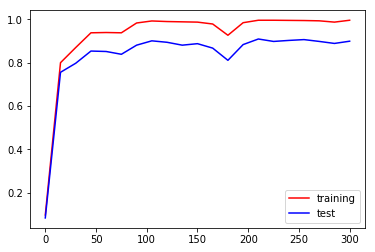

In [5]:
plt.plot(overfitting_log['accuracy_train_itr'], overfitting_log['accuracy_train'], 'r', label='training')
plt.plot(overfitting_log['accuracy_test_itr'], overfitting_log['accuracy_test'], 'b', label='test')
plt.legend()
plt.show()

## Image manipulation with Pillow

In [19]:
mnist = MNIST()
train_images, train_labels, test_images, test_labels = mnist.get_dataset(normalize=False)
train_images = train_images[:1500, :]
train_labels = train_labels[:1500]

This is MNIST class
Loaded MNIST pickle from /Users/takafumi/Repos/deep-learning-notes/lib/../tmp/mnist.pkl


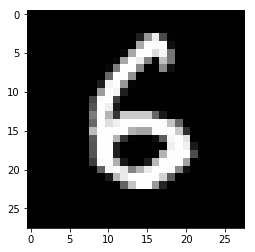

In [51]:
def random_translate(mnist_data):
    
    data = mnist_data.reshape(28, 28).astype(np.uint8)
    rotation = np.random.randint(-15, 15)
    x = np.random.randint(-2, 2)
    y = np.random.randint(-2, 2)
    matrix = [
        1, 0, x,
        0, 1, y,
        0, 0]
    image = Image.fromarray(data, 'L')
    image = image.rotate(rotation, resample=Image.BICUBIC)
    image = image.transform((28, 28), Image.AFFINE, matrix, resample=Image.BICUBIC)
    imshow(np.asarray(image), cmap='gray')
    
index = 106
imshow(train_images[index, :].reshape(28, 28), cmap='gray')

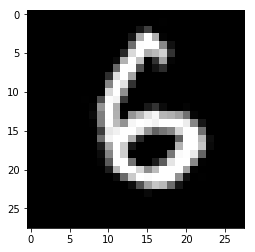

In [53]:
random_translate(train_images[index, :])

## Augmented

In [54]:
augmented_log = pickle.load(open('code/08_techniques/08_8_data_augmentation/08_8_2_augmentation_log.pkl', "rb"))
train_acc = augmented_log["accuracy_train"][-1]
test_acc = augmented_log["accuracy_test"][-1]
print("Training accuracy:", train_acc)
print("Test accuracy:", test_acc)
print("Variance:", (train_acc - test_acc) * 100)

Training accuracy: 0.977333333333
Test accuracy: 0.925
Variance: 5.23333333333


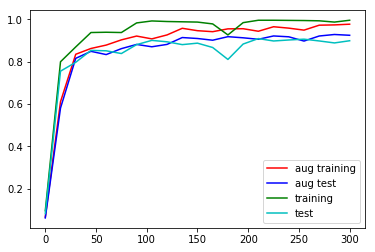

In [57]:
plt.plot(augmented_log['accuracy_train_itr'], augmented_log['accuracy_train'], 'r', label='aug training')
plt.plot(augmented_log['accuracy_test_itr'], augmented_log['accuracy_test'], 'b', label='aug test')

plt.plot(overfitting_log['accuracy_train_itr'], overfitting_log['accuracy_train'], 'g', label='training')
plt.plot(overfitting_log['accuracy_test_itr'], overfitting_log['accuracy_test'], 'c', label='test')
plt.legend()
plt.show()